# *1. Importing Modules and Methods*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

# *2. Data Exploration*

#### *1. 1. Loading Dataset*

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
valueCounts = data["Class"].value_counts()
for count in valueCounts:
  print(str(count/len(data) * 100) + ' %')

99.82725143693798 %
0.1727485630620034 %


In [ ]:
nonfrauds = data[data.Class == 0]
print(nonfrauds.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
frauds = data[data.Class == 1]
print(frauds.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


<Axes: title={'center': 'Frequency Of Class Observations'}, xlabel='Class', ylabel='Frequency Of Observation'>

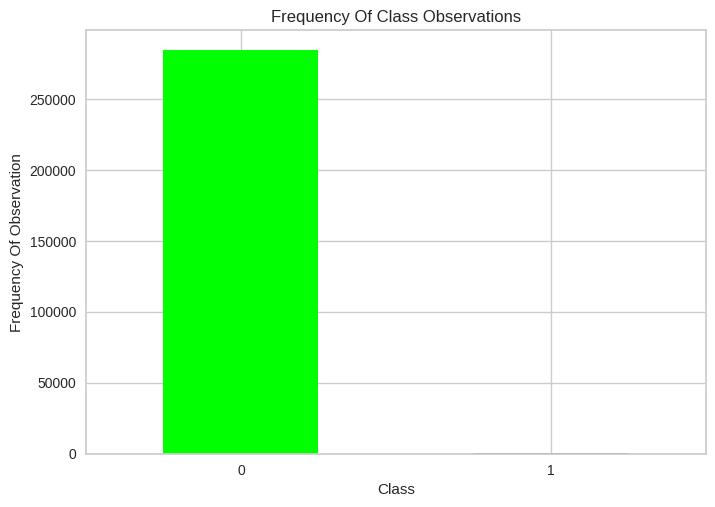

In [ ]:
plt.xlabel("Class")
plt.ylabel("Frequency Of Observation")
color = ['lime', 'sienna']
valueCounts.plot(kind = 'bar', title = 'Frequency Of Class Observations', rot = 0, color=color)

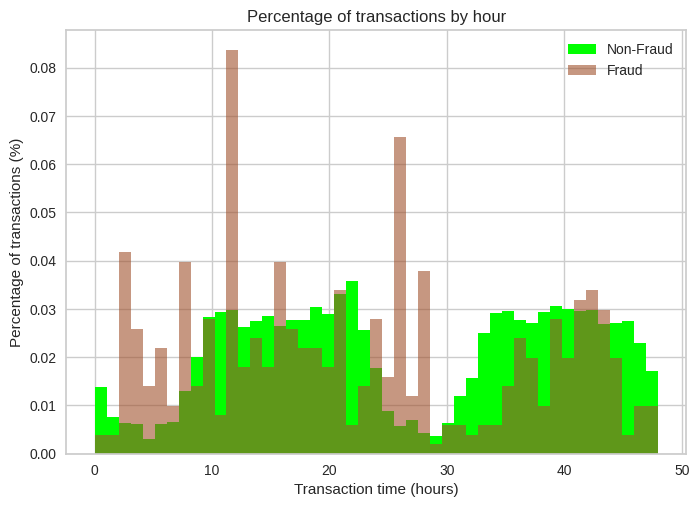

In [ ]:
bins = np.linspace(0, 48, 48)
plt.hist((nonfrauds.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud', color='lime')
plt.hist((frauds.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud', color='sienna')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

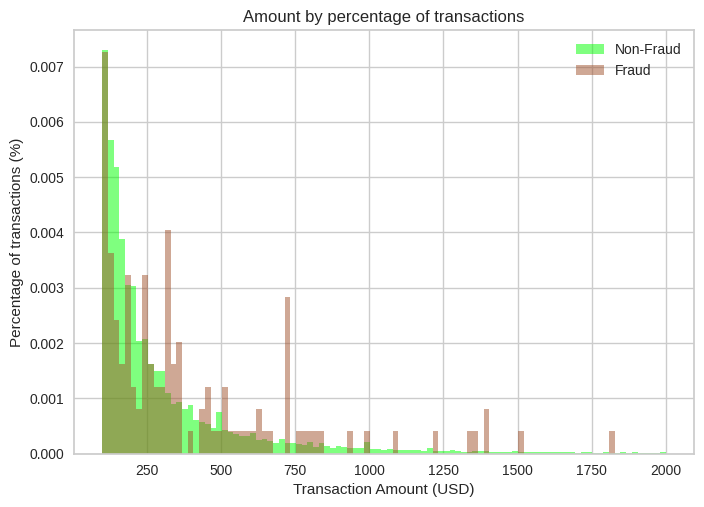

In [ ]:
bins = np.linspace(100, 2000, 100)
plt.hist(nonfrauds.Amount, bins, alpha=0.5, density=True, label='Non-Fraud', color='lime')
plt.hist(frauds.Amount, bins, alpha=0.5, density=True, label='Fraud', color='sienna')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

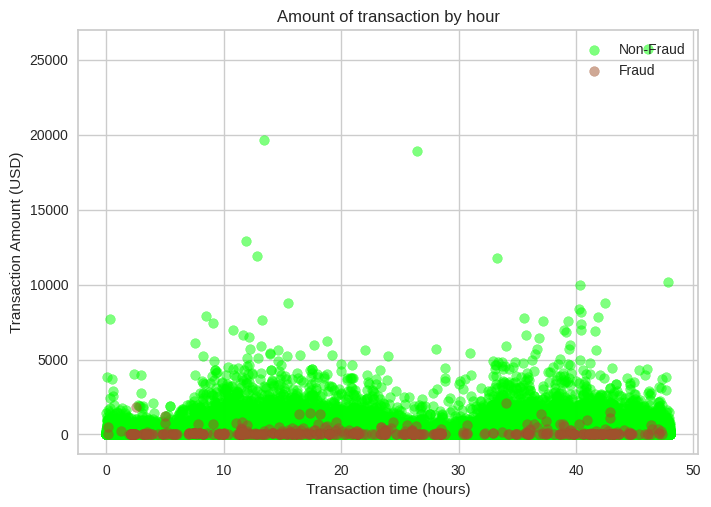

In [ ]:
plt.scatter((nonfrauds.Time/(60*60)), nonfrauds.Amount, alpha=0.5, label='Non-Fraud', color='lime')
plt.scatter((frauds.Time/(60*60)), frauds.Amount, alpha=0.5, label='Fraud', color='sienna')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time (hours)")
plt.ylabel('Transaction Amount (USD)')
plt.legend(loc='upper right')
plt.show()

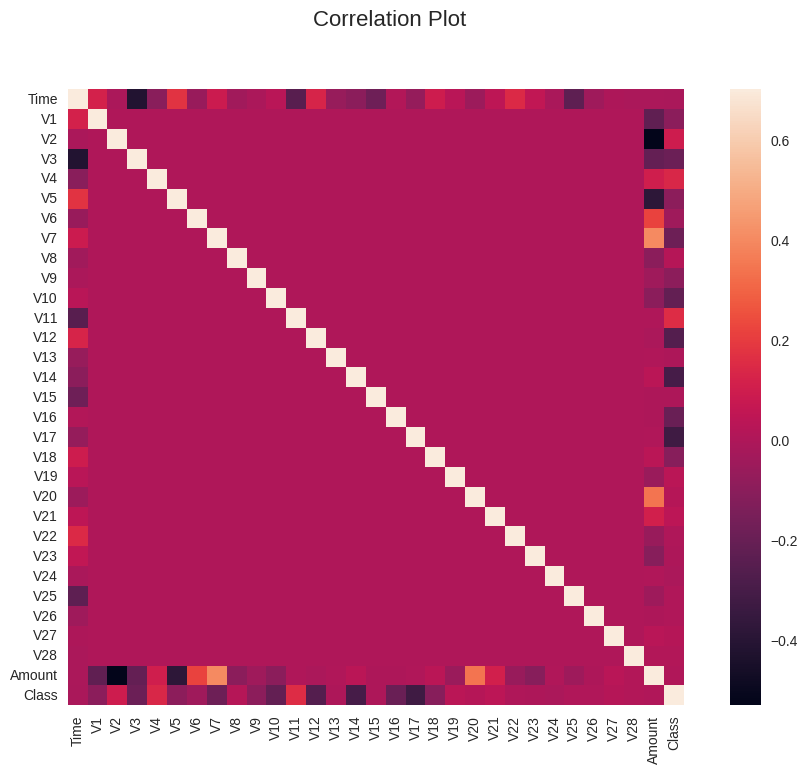

In [ ]:
correlation_matrix = data.corr()
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Correlation Plot', fontsize = 16)
sns.heatmap(correlation_matrix,vmax = 0.7, square = True)
plt.show()

# *2. Preprocessing*

#### *2. 1. Split Training and Testing Data*

In [ ]:
X = data.drop("Class", axis="columns")
y = data["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#### *2. 2. Normalization*

In [ ]:
scaler = RobustScaler()

X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))

X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,-0.371022,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.125852
40018,-0.524778,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,0.049645
250360,0.823727,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,-0.209985
234820,0.744617,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,-0.242664
10001,-0.818970,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,-0.253233


#### *2. 1. Resample Data With RUS & ROS*

In [ ]:
rus = RandomUnderSampler()
ros = RandomOverSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

# *3. Random Forest Classifier*

In [ ]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.78      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56855     6]
 [   22    79]]


In [ ]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train_ros, y_train_ros)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56854     7]
 [   20    81]]


In [ ]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train_rus, y_train_rus)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.92      0.11       101

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion matrix:
 [[55384  1477]
 [    8    93]]


# *3. K-Means Clustering*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

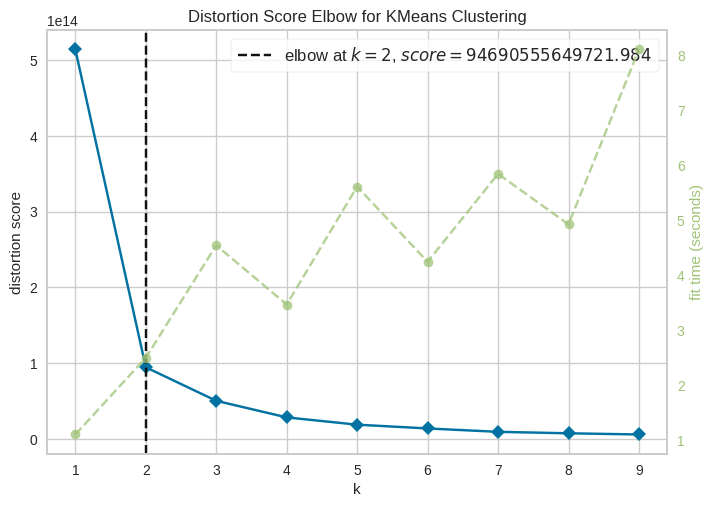

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state = 42)
distortionVisualizer = KElbowVisualizer(model, k = (1, 10))
distortionVisualizer.fit(X_train)
distortionVisualizer.show()

In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state = 0)

featuresTrain = train.drop(['Class'],axis = 1)
featuresTrain = featuresTrain.values
labelsTrain = pd.DataFrame(train[['Class']])
labelsTrain = labelsTrain.values

featuresTest = test.drop(['Class'],axis = 1)
featuresTest = featuresTest.values
labelsTest = pd.DataFrame(test[["Class"]])
labelsTest = labelsTest.values

In [ ]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(featuresTrain)
labelsTrainPredicted = model.predict(featuresTrain)
labelsTestPredicted = model.predict(featuresTest)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Precison:', precision_score(labelsTest,labelsTestPredicted))
print('Recall:', recall_score(labelsTest,labelsTestPredicted))
print('Accuracy:', accuracy_score(labelsTest,labelsTestPredicted))
print('f1-score:',f1_score(labelsTest,labelsTestPredicted))
print('\nConfusion Matrix:\n',confusion_matrix(labelsTest,labelsTestPredicted))

Precison: 0.0021483675661599557
Recall: 0.6534653465346535
Accuracy: 0.4612197605421158
f1-score: 0.004282655246252677

Confusion Matrix:
 [[26206 30655]
 [   35    66]]


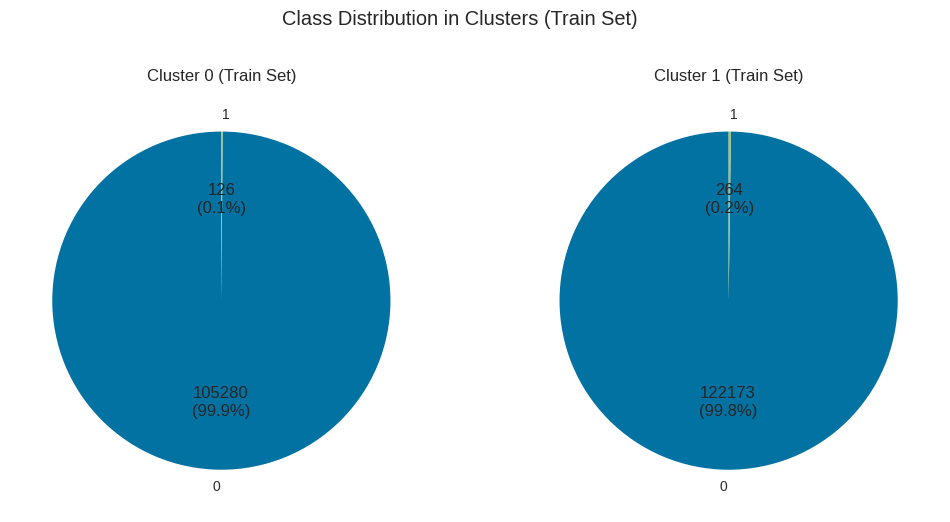

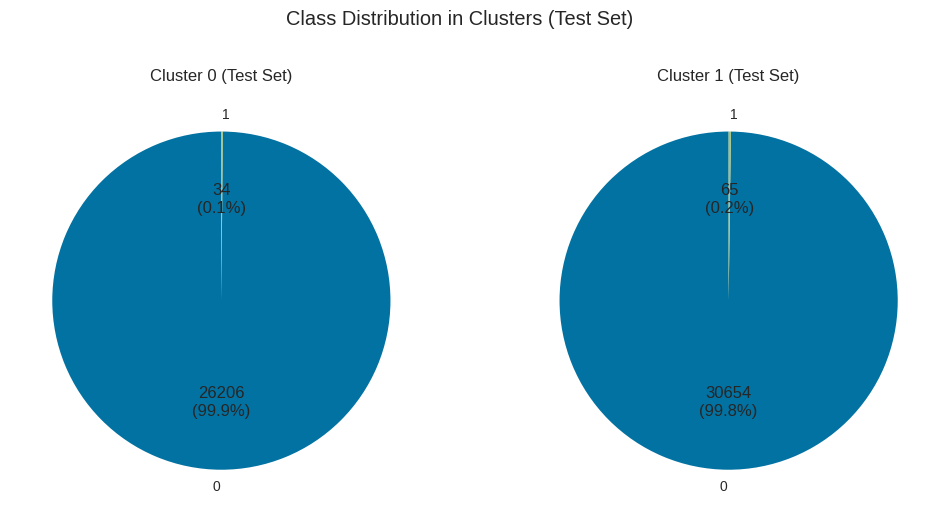

In [ ]:
# Create DataFrames for train and test results
trainResult = pd.DataFrame({'Class': labelsTrain.flatten(), 'Cluster': labelsTrainPredicted})
testResult = pd.DataFrame({'Class': labelsTest.flatten(), 'Cluster': labelsTestPredicted})

# Function to plot pie chart for a specific set and cluster
def plot_pie_chart(ax, data_counts, title):
    ax.pie(data_counts, labels=data_counts.index,
           autopct=lambda pct: "{:d}\n({:.1f}%)".format(int(pct / 100. * np.sum(data_counts)), pct),
           startangle=90)
    ax.set_title(title)

# Plot pie charts for train set
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Class Distribution in Clusters (Train Set)')

for i, ax in enumerate(axes):
    cluster_data = trainResult[trainResult['Cluster'] == i]['Class'].value_counts()
    plot_pie_chart(ax, cluster_data, f'Cluster {i} (Train Set)')

plt.show()

# Plot pie charts for test set
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Class Distribution in Clusters (Test Set)')

for i, ax in enumerate(axes):
    cluster_data = testResult[testResult['Cluster'] == i]['Class'].value_counts()
    plot_pie_chart(ax, cluster_data, f'Cluster {i} (Test Set)')

plt.show()
